In [1]:
import pandas as pd
from sqlalchemy import create_engine
import warnings 
warnings.warn("This is a warning message") 
warnings.filterwarnings("ignore")

C:\Users\JOY\AppData\Local\Temp\ipykernel_4412\2640078680.py:4: UserWarning: This is a warning message
  warnings.warn("This is a warning message")


In [2]:
server = 'DESKTOP-J2NCU9N'
database = 'Sustainable energy'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f"mssql+pyodbc://{server}/{database}?driver={driver}&trusted_connection=yes"
engine = create_engine(connection_string)
query = "SELECT * FROM dbo.energy_dataset_"
df = pd.read_sql(query, engine)
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,Geothermal,93.423203,103853.21875,248708.484375,2953.248779,89.887566,4,473224768.0,Government,9.207772e+06,6663.816406,81.742462,1366
1,Geothermal,590.468933,190223.06250,166104.171875,5305.173828,84.403343,4,167069728.0,Private,1.685101e+06,30656.050781,78.139038,1743
2,Solar,625.951172,266023.46875,424114.625000,2620.192627,60.498249,2,84636104.0,Private,5.111813e+06,1749.613770,8.461296,363
3,Solar,779.998718,487039.53125,308337.718750,1925.250366,86.897858,3,396768992.0,Private,4.805902e+06,43233.238281,8.402441,2821
4,Hydroelectric,242.106842,482815.09375,360437.781250,3948.945312,70.949348,2,35744128.0,Government,1.668601e+07,14858.663086,28.822868,2583


In [3]:
df.describe()

,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,14999.000000,14999.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,495.855747,252341.083924,225968.642380,5030.196474,75.219334,2.501267,2.514849e+08,1.002977e+07,25234.722162,50.724179,2502.668600
std,288.212872,144062.644520,129217.853258,2894.096329,14.485289,1.123306,1.432843e+08,5.787303e+06,14378.915291,28.556578,1451.212661
min,1.091767,1030.103638,584.048035,2.200208,50.003494,1.000000,1.008107e+06,5.155841e+04,100.974457,1.009712,10.000000
25%,245.475742,128566.085938,115585.789062,2543.341370,62.694075,1.000000,1.259709e+08,4.963454e+06,12754.477051,26.224427,1228.000000
50%,492.907562,253204.000000,225213.968750,5054.036377,75.279701,3.000000,2.539910e+08,1.002414e+07,25424.477539,50.250206,2496.000000
75%,742.254669,377042.437500,338650.765625,7536.935547,87.754316,4.000000,3.759130e+08,1.507417e+07,37750.427734,75.720133,3765.000000
max,999.982971,499991.187500,449922.656250,9999.145508,99.994957,4.000000,4.999407e+08,1.999855e+07,49997.578125,99.980492,4999.000000


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Type_of_Renewable_Energy         0
Installed_Capacity_MW            0
Energy_Production_MWh            1
Energy_Consumption_MWh           1
Energy_Storage_Capacity_MWh      0
Storage_Efficiency_Percentage    0
Grid_Integration_Level           0
Initial_Investment_USD           0
Funding_Sources                  0
Financial_Incentives_USD         0
GHG_Emission_Reduction_tCO2e     0
Air_Pollution_Reduction_Index    0
Jobs_Created                     0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Type_of_Renewable_Energy         0
Installed_Capacity_MW            0
Energy_Production_MWh            0
Energy_Consumption_MWh           0
Energy_Storage_Capacity_MWh      0
Storage_Efficiency_Percentage    0
Grid_Integration_Level           0
Initial_Investment_USD           0
Funding_Sources                  0
Financial_Incentives_USD         0
GHG_Emission_Reduction_tCO2e     0
Air_Pollution_Reduction_Index    0
Jobs_Created                     0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df[['Type_of_Renewable_Energy','Funding_Sources']].nunique()

Type_of_Renewable_Energy    7
Funding_Sources             3
dtype: int64

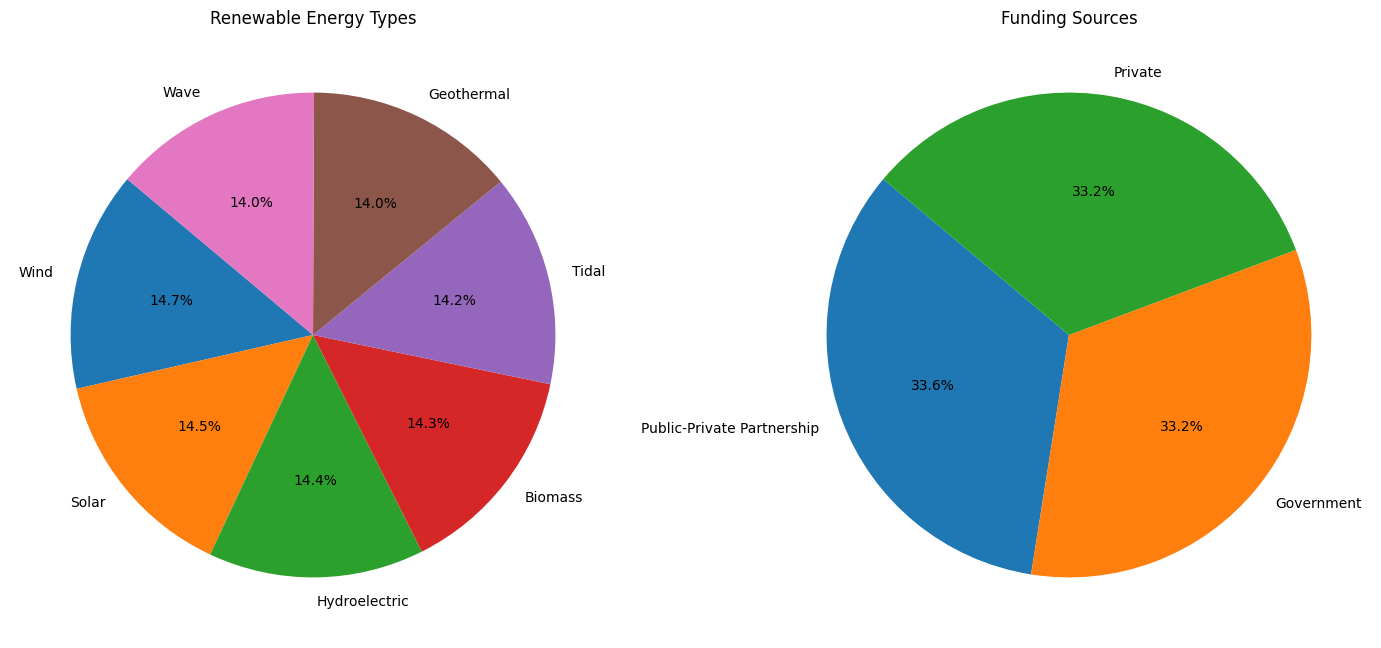

In [10]:
energy_counts = df['Type_of_Renewable_Energy'].value_counts()
funding_counts = df['Funding_Sources'].value_counts() 

fig, ax = plt.subplots(1, 2, figsize=(14, 7)) 

ax[0].pie(energy_counts, labels=energy_counts.index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Renewable Energy Types') 
ax[1].pie(funding_counts, labels=funding_counts.index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Funding Sources') 
plt.tight_layout()
plt.show()

  Type_of_Renewable_Energy  Jobs_Created
0                  Biomass   2512.946977
1               Geothermal   2488.813302
2            Hydroelectric   2510.081595
3                    Solar   2490.255417
4                    Tidal   2519.101743
5                     Wave   2484.237458
6                     Wind   2512.348932
  Type_of_Renewable_Energy  GHG_Emission_Reduction_tCO2e
0                  Biomass                  25645.694340
1               Geothermal                  25070.532563
2            Hydroelectric                  25304.016971
3                    Solar                  24666.648393
4                    Tidal                  25525.045675
5                     Wave                  25282.794306
6                     Wind                  25174.955257
  Type_of_Renewable_Energy  Air_Pollution_Reduction_Index
0                  Biomass                      50.778550
1               Geothermal                      51.347735
2            Hydroelectric                

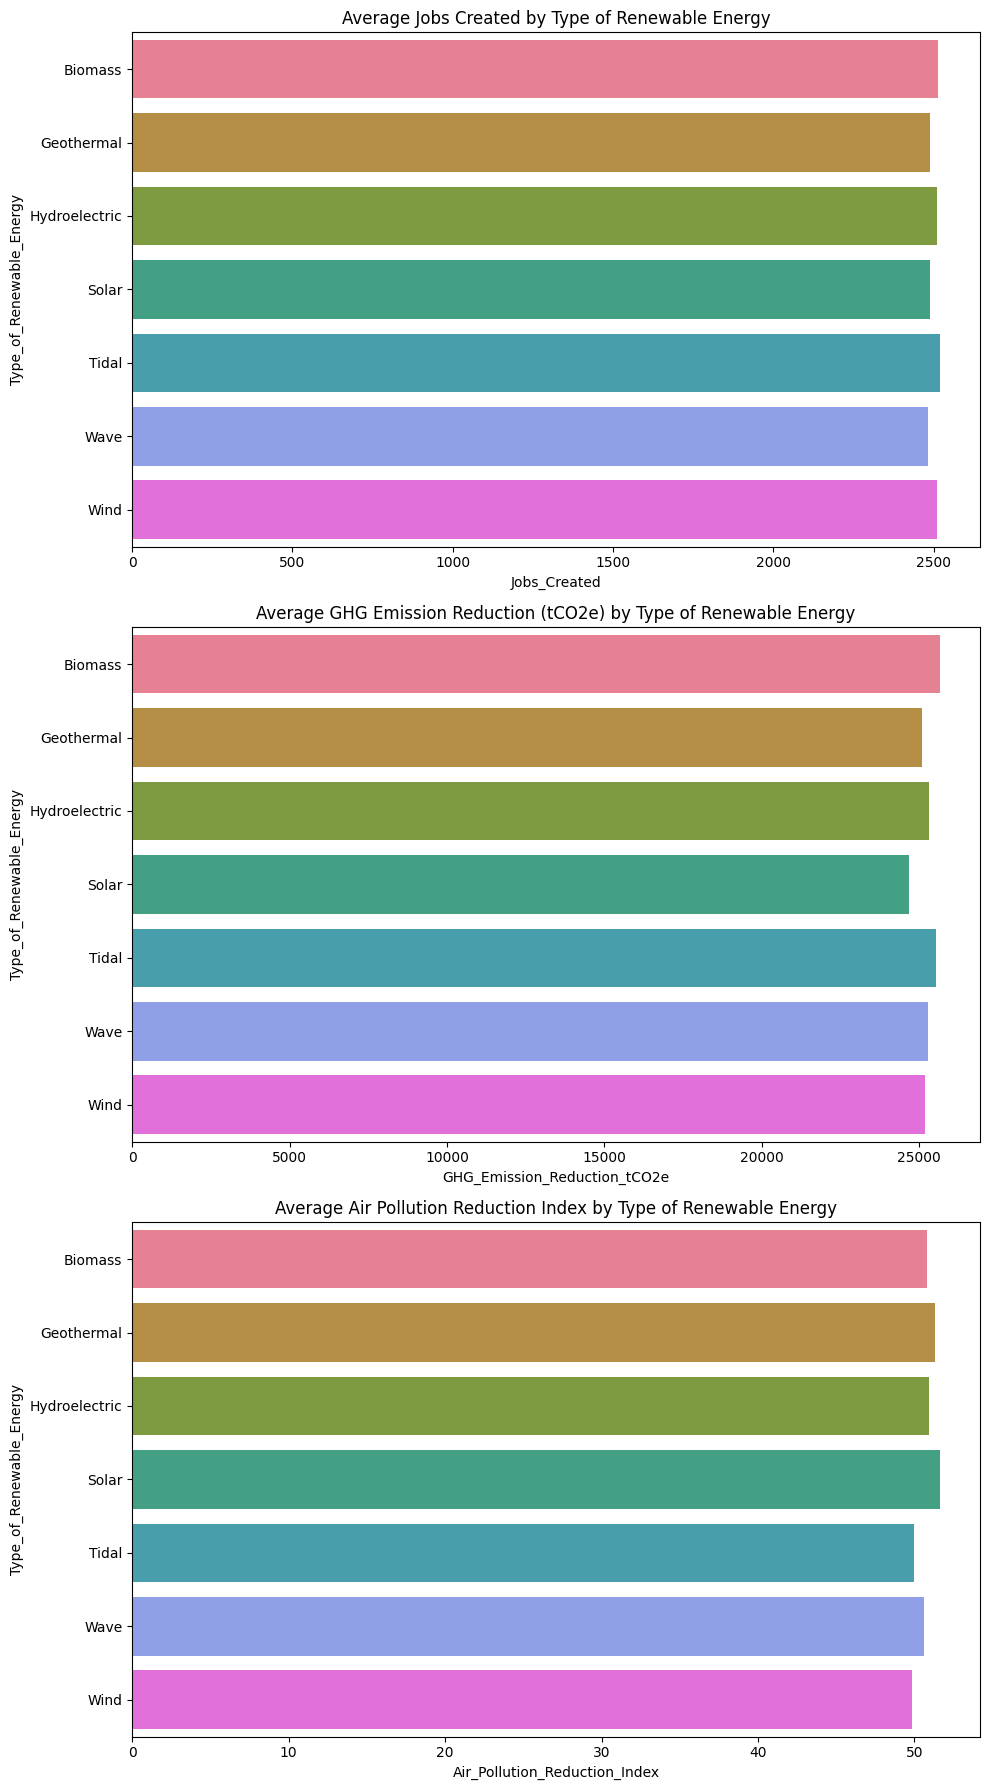

In [11]:
 

plt.figure(figsize=(10, 18))  
# Jobs Created
plt.subplot(3, 1, 1)   
df_jobs = df.groupby('Type_of_Renewable_Energy')['Jobs_Created'].mean().reset_index()
print(df_jobs)
sns.barplot(x='Jobs_Created', y='Type_of_Renewable_Energy', data=df_jobs, palette='husl')
plt.title('Average Jobs Created by Type of Renewable Energy')

# GHG Emission Reduction
plt.subplot(3, 1, 2)
df_ghg = df.groupby('Type_of_Renewable_Energy')['GHG_Emission_Reduction_tCO2e'].mean().reset_index()
print(df_ghg)
sns.barplot(x='GHG_Emission_Reduction_tCO2e', y='Type_of_Renewable_Energy', data=df_ghg, palette='husl')
plt.title('Average GHG Emission Reduction (tCO2e) by Type of Renewable Energy')

# Air Pollution Reduction Index
plt.subplot(3, 1, 3)
df_air = df.groupby('Type_of_Renewable_Energy')['Air_Pollution_Reduction_Index'].mean().reset_index()
print(df_air)
sns.barplot(x='Air_Pollution_Reduction_Index', y='Type_of_Renewable_Energy', data=df_air, palette='husl')
plt.title('Average Air Pollution Reduction Index by Type of Renewable Energy') 

plt.tight_layout() 
plt.show()




In [12]:
df_ed = df.groupby('Type_of_Renewable_Energy')[['Energy_Production_MWh','Energy_Consumption_MWh', 'Energy_Storage_Capacity_MWh']] .mean().reset_index()              
df_ed      


,Type_of_Renewable_Energy,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh
0,Biomass,252599.445139,222085.029334,5066.702056
1,Geothermal,252893.832683,225350.324548,4926.629769
2,Hydroelectric,251070.361850,221711.577371,5032.797484
3,Solar,252813.676052,228301.990726,5012.866898
4,Tidal,254257.305877,227157.183432,5055.104436
5,Wave,252571.041699,228507.626521,5053.393094
6,Wind,250316.632497,228669.819706,5064.645189


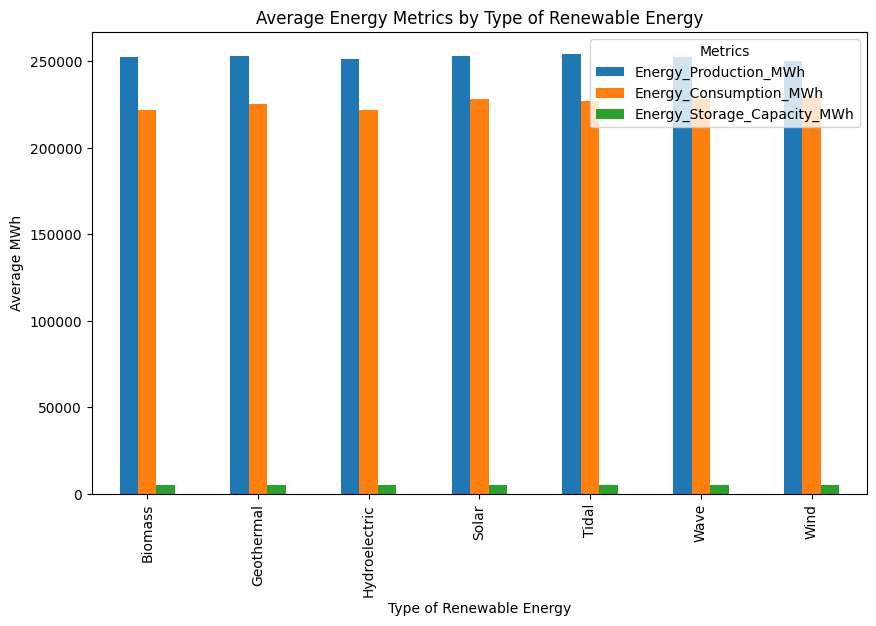

In [13]:
ax = df_ed.plot(x='Type_of_Renewable_Energy', kind='bar', stacked=False, figsize=(10, 6)) 

ax.set_title('Average Energy Metrics by Type of Renewable Energy')
ax.set_xlabel('Type of Renewable Energy')
ax.set_ylabel('Average MWh') 

ax.legend(title='Metrics') 

plt.show()

In [14]:
df_fd = df.groupby('Type_of_Renewable_Energy')['Initial_Investment_USD' ].mean().reset_index()
df_fd2 = df.groupby('Type_of_Renewable_Energy')['Financial_Incentives_USD'].mean().reset_index()
print(df_fd,df_fd2)

  Type_of_Renewable_Energy  Initial_Investment_USD
0                  Biomass            2.528118e+08
1               Geothermal            2.495496e+08
2            Hydroelectric            2.528071e+08
3                    Solar            2.561928e+08
4                    Tidal            2.478742e+08
5                     Wave            2.484854e+08
6                     Wind            2.524056e+08   Type_of_Renewable_Energy  Financial_Incentives_USD
0                  Biomass              9.961637e+06
1               Geothermal              1.007684e+07
2            Hydroelectric              1.001431e+07
3                    Solar              9.912928e+06
4                    Tidal              9.923436e+06
5                     Wave              1.009080e+07
6                     Wind              1.023284e+07


In [15]:
print( df_fd2)

  Type_of_Renewable_Energy  Financial_Incentives_USD
0                  Biomass              9.961637e+06
1               Geothermal              1.007684e+07
2            Hydroelectric              1.001431e+07
3                    Solar              9.912928e+06
4                    Tidal              9.923436e+06
5                     Wave              1.009080e+07
6                     Wind              1.023284e+07


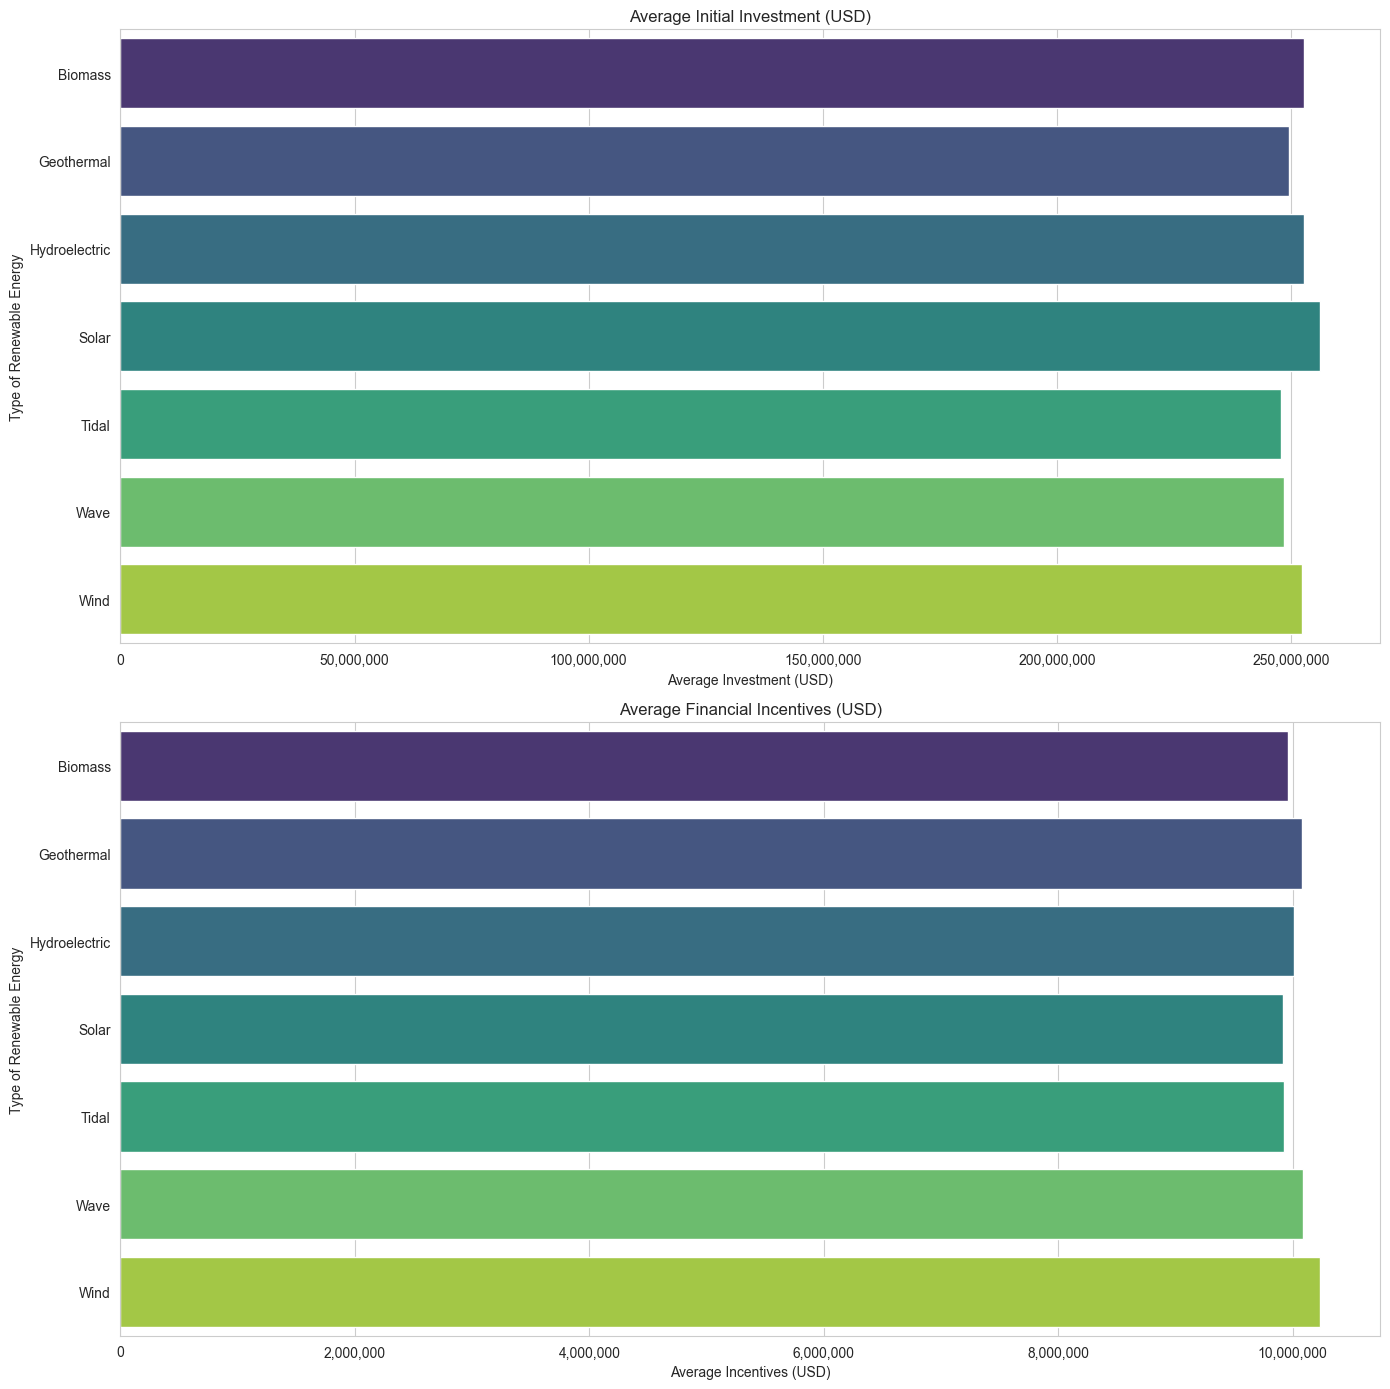

In [18]:
 
import matplotlib.ticker as ticker 
 
sns.set_style('whitegrid')

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Plot for Average Initial Investment USD
sns.barplot(x='Initial_Investment_USD', y='Type_of_Renewable_Energy', data=df_fd, ax=ax[0], palette='viridis')
ax[0].set_title('Average Initial Investment (USD)')
ax[0].set_xlabel('Average Investment (USD)')
ax[0].set_ylabel('Type of Renewable Energy') 

ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Plot for Average Financial Incentives USD
sns.barplot(x='Financial_Incentives_USD', y='Type_of_Renewable_Energy', data=df_fd2, ax=ax[1], palette='viridis')
ax[1].set_title('Average Financial Incentives (USD)')
ax[1].set_xlabel('Average Incentives (USD)')
ax[1].set_ylabel('Type of Renewable Energy') 

ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')) 

plt.tight_layout() 

plt.show()
